In [ ]:
#importing all the important libraries for the developement of the model as well as the machine learning models through the scikit learn library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#importing the dataset in colab through the pandas library, with the encoding as encoding is in latin.
spam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding = 'latin-1')

In [ ]:
#dataset before removing unnecessary columns.
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#dropping all the unnecessary columns from the dataset using the drop function.
spam = spam.drop(labels = {'Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'}, axis = 1)

In [ ]:
#datsaset after removing unnecessary columns.
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#displaying first five rows of the dataset using the head function or method.
spam.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#info of the dataset.
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='v1', ylabel='count'>

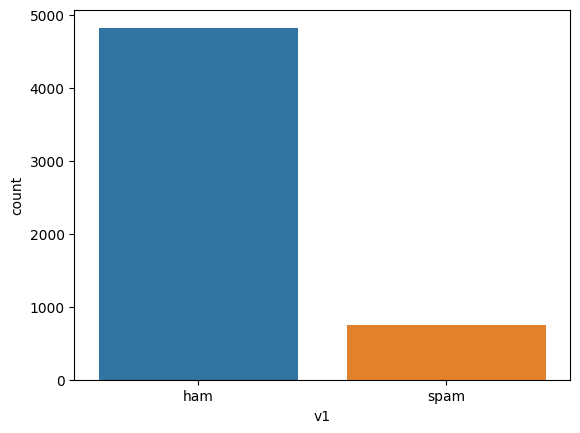

In [ ]:
#countplot of target attribute giving the count of spam sms and ham sms.
sns.countplot(x = 'v1', data = spam)

In [ ]:
#predictor column
spam['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
#using the tf-idf technique to count frequency of a particular word and to check whether that word is important or not.
sample_text = ['This is the first copy.','This is the second copy.','And this is the third one.','Is this the first copy?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_text)

In [ ]:
#X has been converted to sparse matrix using the tf-idf vectorizer.
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
#displaying the values of X after converting the sparse matrix to normal array.
print(X.toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.42796959 0.         0.34989318 0.         0.67049706
  0.34989318 0.         0.34989318]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [ ]:
#displaying the features names of the demo sentence given above.
print(vectorizer.get_feature_names_out())

['and' 'copy' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
#now fitting the predictor attribute in the vectorizer so as to get the vectors of sms.
spam_message = vectorizer.fit_transform(spam['v2'])

In [ ]:
#shape of sms after creating the vectors.
spam_message.shape

(5572, 8672)

In [ ]:
##displaying the features names of the sms.
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [ ]:
#displaying the array
print(spam_message.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#dropping the v2 attribute that contains the sms and adding the vectorized attribute to the dataset.
spam.drop(['v2'], axis = 1, inplace = True)

In [ ]:
#converting and adding the vectorized sms into a dataframe.
spam_ms = pd.DataFrame(spam_message.toarray())

In [ ]:
#joining the dataframes.
spam = pd.concat([spam,spam_ms], axis = 1)

In [ ]:
#new dataframe after combining the above two.
spam

,v1,0,1,2,3,4,5,6,7,8,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
0,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#dropping the target attribute from the predictor variable.
X = spam.drop(labels = {'v1'}, axis = 1)

In [ ]:
#assigning v1 attributee to the target attribute.
y = spam[['v1']]

In [ ]:
y

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [ ]:
#splitting the dataset into training and testing set.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
#displaying the shape of the both training and testing dataset.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457, 1)
(1115, 1)


In [ ]:
#imported LogisticRegression() model directly through the scikit learn library specified in cell number 1.
model1 = LogisticRegression()
model1.fit(X_train,y_train)
print("Training_Score:",model1.score(X_train, y_train)*100)
print("Testing_score :",model1.score(X_test, y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training_Score: 97.41978909580436
Testing_score : 96.32286995515696


In [ ]:
#imported RandomForestClassifier() model directly through the scikit learn library specified in cell number 1.
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
print("Training_Score:",model2.score(X_train, y_train)*100)
print("Testing_score :",model2.score(X_test, y_test)*100)

<ipython-input-168-ff0360cebd7f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


Training_Score: 100.0
Testing_score : 97.847533632287


In [ ]:
#imported GaussianNB() model directly through the scikit learn library specified in cell number 1.
model3 = GaussianNB()
model3.fit(X_train,y_train)
print("Training_Score:",model3.score(X_train, y_train)*100)
print("Testing_score :",model3.score(X_test, y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training_Score: 94.92932465784159
Testing_score : 89.95515695067265


In [ ]:
#imported Support vector Machine aka SVC() model directly through the scikit learn library specified in cell number 1.
model4 = SVC()
model4.fit(X_train, y_train)
print("Training_Score:",model4.score(X_train, y_train)*100)
print("Testing_score :",model4.score(X_test, y_test)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training_Score: 99.82050706753421
Testing_score : 97.75784753363229
